```
    _/    _/  _/_/_/  _/       Numerical Simulation Laboratory
   _/_/  _/ _/       _/       Physics Department
  _/  _/_/    _/    _/       Universita' degli Studi di Milano
 _/    _/       _/ _/       Prof. D.E. Galli
_/    _/  _/_/_/  _/_/_/_/ email: Davide.Galli@unimi.it
```

# Lesson 1

In [1]:
from matplotlib import pyplot as plt
import numpy as np

To compute the statistical uncertainties, we use the blocking method: the simulation outputs ```N_blocks``` values for the estimated quantity, calculated with a mean over ```N_throws_per_block``` random generated numbers. 

In [2]:
def error(ave, ave2, n):
    if n == 0:
        return 0
    return np.sqrt((ave2 - ave*ave) / n)

def blocks_value(data):
    total = 0.
    total2 = 0.
    y = np.zeros((len(data), 2))
    for i in range(len(data)):
        total = total + data[i]
        total2 = total2 + data[i]*data[i]
        ave = total / (i+1)
        ave2 = total2 / (i+1)
        y[i, 0] = ave
        y[i, 1] = error(ave, ave2, i)
    return y

## Exercise 1.1

In this exercise, we test our pseudo-random number generator.

In [3]:
# Read parameters from info file
with open("data/1.1-info.dat") as file:
    N_blocks = int(file.readline())
    N_throws_per_block = int(file.readline())
print(f"N_blocks = {N_blocks}\nN_throws_per_block = {N_throws_per_block}")

# Read data
data = np.loadtxt("data/1.1.dat")

N_blocks = 100
N_throws_per_block = 10000


### Mean value

First of all, we make sure that the mean value of its outputted values (in the $[0, 1)$ range) is
$$\left<r\right>=\frac 12.$$

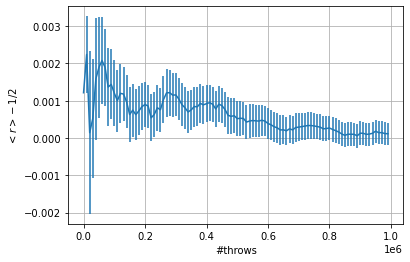

<r>-1/2 = 1e-04 ± 3e-04


In [4]:
x = np.arange(N_blocks) * N_throws_per_block
y = blocks_value(data[:,0])

plt.errorbar(x,y[:,0]-0.5, yerr=y[:,1])
plt.xlabel(r"#throws")
plt.ylabel(r"$<r>-1/2$")
plt.grid(True)
plt.show()
print(f"<r>-1/2 = {y[-1,0]-0.5:.0e} ± {y[-1,1]:.0e}")

The obtained value is consistent with the expected mean of $\frac 12$.

### Variance

Afterwards, we compare the variance to its expected value,
$$\left<\sigma^2\right> = \left<\left(r-\frac 12\right)^2\right> = \frac 1{12}.$$

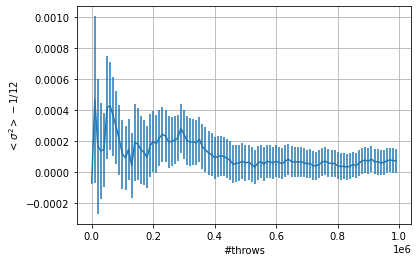

<𝜎^2>-1/12 = 7e-05 ± 8e-05


In [5]:
x = np.arange(N_blocks) * N_throws_per_block
y = blocks_value(data[:, 1])

plt.errorbar(x, y[:, 0] - 1/12, yerr=y[:, 1])
plt.xlabel(r"#throws")
plt.ylabel(r"$<\sigma^2>-1/12$")
plt.grid(True)
plt.show()
print(f"<𝜎^2>-1/12 = {y[-1,0]-1/12:.0e} ± {y[-1,1]:.0e}")

The obtained value is consistent with the expected $\sigma$ of $\frac 1{12}$.

### $\chi$ squared

Finally, we calculate the reduced chi squared,
$$\tilde\chi^2=\frac{\chi^2}{100}$$
(where 100 is the number of subintervals used to calculate it) to check whether the generated numbers follow a uniform distribution.

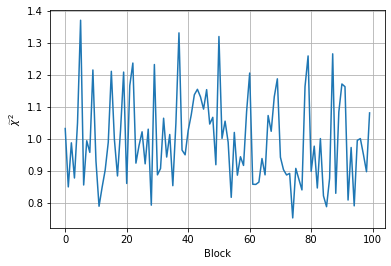

In [6]:
x = np.arange(N_blocks)
chi2 = data[:,2]/100

plt.plot(x, chi2)
plt.xlabel(r"Block")
plt.ylabel(r"$\widetilde\chi^2$")
plt.grid(True)
plt.show()

Since the reduced $\chi^2$ is approximately equal to $1$, it is rather likely that the numbers are sampled from a uniform distribution.

## Exercise 1.2

In this exercise, we test the Central Limit Theorem for various probability distributions, by plotting `N_throws` sums of a different number of variables, varying from 1 to 100.

In [7]:
# Read parameters from info file
with open("data/1.2-info.dat") as file:
    N_throws = int(file.readline())
    N_sums = np.loadtxt(file, dtype="int")
print(f"N_throws = {N_throws}\nN_sums = {N_sums}")

# Read data
data_unif = np.loadtxt("data/1.2-unif.dat")
data_exp = np.loadtxt("data/1.2-exp.dat")
data_cauchy = np.loadtxt("data/1.2-cauchy.dat")

N_throws = 10000
N_sums = [  1   2  10 100]


### Uniform distribution

We sum variables distributed like a 6-face dice. The limit of the sum is a Gaussian distribution.

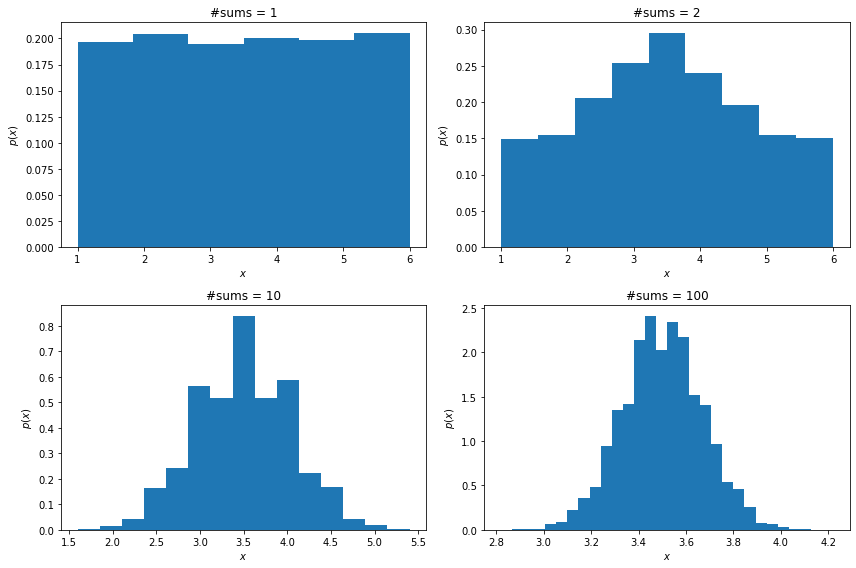

In [9]:
bins = [ 6, 9, 15, 30]
plt.figure(figsize=(12, 8))
for i in range(0, 4):
    plt.subplot(2, 2, i+1)
    plt.title(f"#sums = {N_sums[i]:n}")
    plt.hist(data_unif[:,i], bins=bins[i], density=True)
    plt.xlabel("$x$")
    plt.ylabel("$p(x)$")
plt.tight_layout()
plt.plot();

### Exponential distribution

We sum variables following a $\exp(x;\lambda=1)$
distribution. The limit of the sum is a Gaussian.

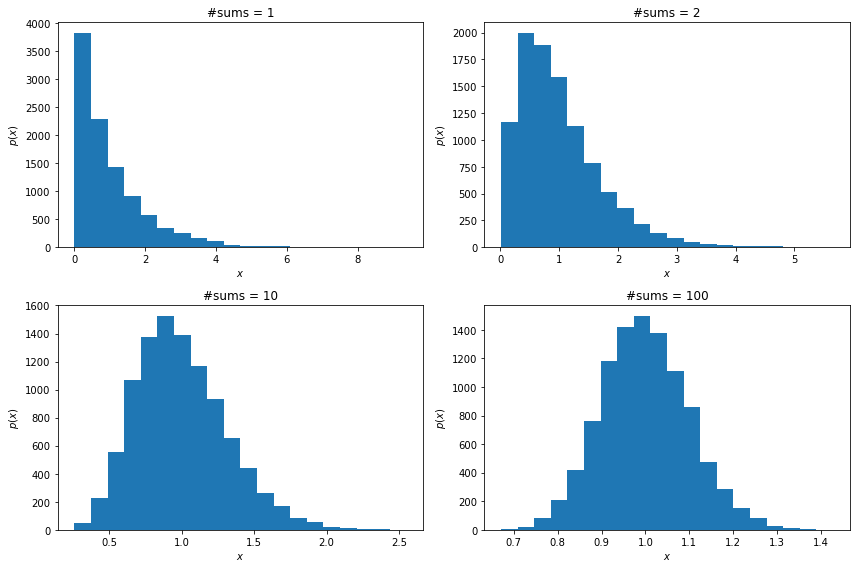

In [13]:
plt.figure(figsize=(12, 8))
for i in range(0, 4):
    plt.subplot(2, 2, i+1)
    plt.title(f"#sums = {N_sums[i]:n}")
    plt.hist(data_exp[:,i], bins=20)
    plt.xlabel("$x$")
    plt.ylabel("$p(x)$")
plt.tight_layout()
plt.plot();

### Cauchy distribution

We sum variables following a $C(x; \mu=0, \Gamma=1)$ Cauchy distribution. The limit of the sum is not a Gaussian (since the CLT does not apply to distributions with infinite variance), but a Cauchy.

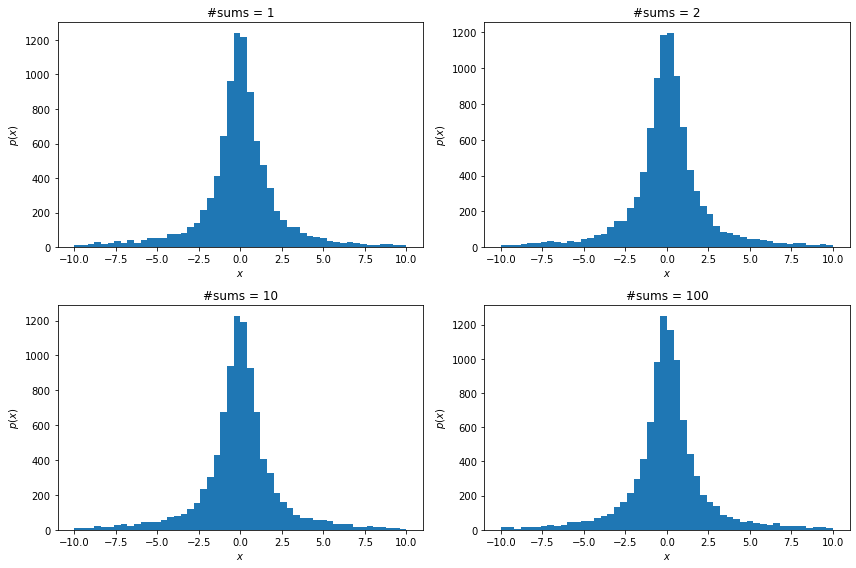

In [14]:
plt.figure(figsize=(12, 8))
for i in range(0, 4):
    plt.subplot(2, 2, i+1)
    plt.title(f"#sums = {N_sums[i]:n}")
    plt.hist(data_cauchy[:,i], bins=50, range=(-10, 10))
    plt.xlabel("$x$")
    plt.ylabel("$p(x)$")
plt.tight_layout()
plt.plot();

## Exercise 1.3

In this exercise, we simulate Buffon's experiment to estimate $\pi$.

In [15]:
# Read parameters from info file
with open("data/1.3-info.dat") as file:
    N_blocks = int(file.readline())
    N_throws_per_block = int(file.readline())
print(f"N_blocks = {N_blocks}\nN_throws_per_block = {N_throws_per_block}")

# Read data
data = np.loadtxt("data/1.3.dat")

N_blocks = 100
N_throws_per_block = 10000


The simulation code outputs `N_blocks` values for $\pi$, calculated using Buffon's method. We compute an incremental mean using the block method.

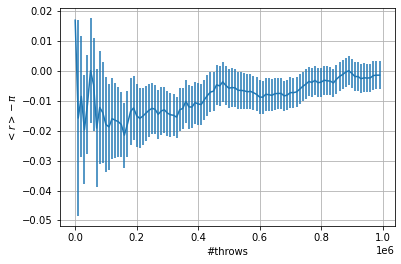

<r>-pi = -1e-03 ± 5e-03


In [16]:
x = np.arange(N_blocks) * N_throws_per_block
y = blocks_value(data)
plt.errorbar(x, y[:,0]-np.pi, yerr=y[:,1])
plt.xlabel(r"#throws")
plt.ylabel(r"$<r>-\pi$")
plt.grid(True)
plt.show()
print(f"<r>-pi = {y[-1,0]-np.pi:.0e} ± {y[-1,1]:.0e}")

The obtained value is consistent with $\pi$.